<a href="https://colab.research.google.com/github/jsscmaina/machinelearning4102/blob/master/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV

In [4]:
from google.colab import files
upload = files.upload()

Saving Nairobi Office Price Ex.csv to Nairobi Office Price Ex.csv


In [27]:
data = pd.read_csv('Nairobi Office Price Ex.csv')
nominal = ['LOC', 'FUR', 'WATER', 'HK_SER']
ordinal = ['AMB', 'PROX_SCH', 'PROX_ROAD', 'PROX_MALL']

for feature in ordinal:
  value = data[feature]
  encoder = LabelEncoder()
  trans_f = encoder.fit_transform(value)
  data[feature] = trans_f
  
data

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,2,0,1,1,yes,yes,32.502345,31.707006
1,madaraka,yes,1,1,1,1,no,no,53.426804,68.777596
2,karen,no,0,0,1,1,yes,yes,61.530358,62.562382
3,karen,yes,1,0,0,0,yes,yes,47.475640,71.546632
4,buruburu,no,1,0,1,1,yes,yes,59.813208,87.230925
5,donholm,no,2,0,0,1,no,yes,55.142188,78.211518
6,langata,no,3,1,1,0,no,yes,52.211797,79.641973
7,langata,yes,2,0,0,1,yes,no,39.299567,59.171489
8,donholm,yes,1,1,0,0,yes,no,48.105042,75.331242
9,karen,yes,2,0,0,0,no,no,52.550014,71.300880


In [26]:
data = pd.concat([pd.get_dummies(data[nominal], prefix='Estate'), data], axis = 1)
data.drop(nominal, axis=1, inplace=True)
data 

,Estate_buruburu,Estate_donholm,Estate_karen,Estate_langata,Estate_madaraka,Estate_no,Estate_yes,Estate_no,Estate_yes,Estate_no,Estate_yes,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,SIZE,PRICE
0,0,0,1,0,0,0,1,0,1,0,1,2,0,1,1,32.502345,31.707006
1,0,0,0,0,1,0,1,1,0,1,0,1,1,1,1,53.426804,68.777596
2,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,61.530358,62.562382
3,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,47.475640,71.546632
4,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,59.813208,87.230925
5,0,1,0,0,0,1,0,1,0,0,1,2,0,0,1,55.142188,78.211518
6,0,0,0,1,0,1,0,1,0,0,1,3,1,1,0,52.211797,79.641973
7,0,0,0,1,0,0,1,0,1,1,0,2,0,0,1,39.299567,59.171489
8,0,1,0,0,0,0,1,0,1,1,0,1,1,0,0,48.105042,75.331242
9,0,0,1,0,0,0,1,1,0,1,0,2,0,0,0,52.550014,71.300880


In [0]:
X = data.drop("PRICE", 1)
y = data["PRICE"]
regressor = LassoCV()
regressor.fit(X, y)


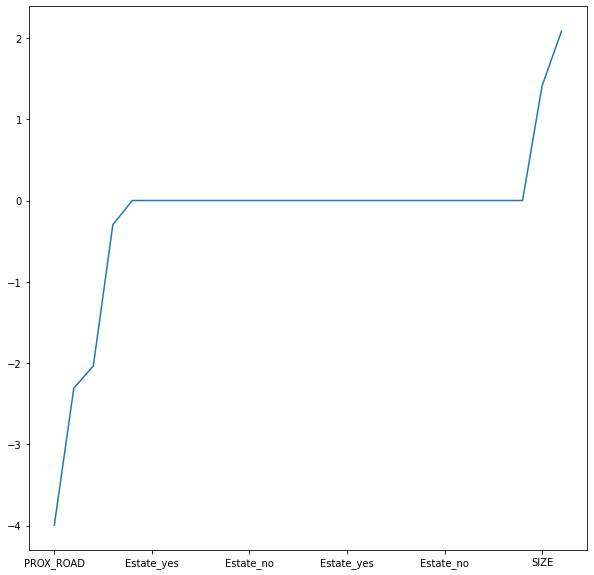

In [23]:
regressor.coef_
coef_col = pd.Series(regressor.coef_, index =  X.columns)
# print(coef_col)
sorted_coef = coef_col.sort_values()
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0) 
sorted_coef.plot()